## Ingeniería de variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def plot_percent_cols(df, li=25, lm=50, ls=75):
    # Calcular los porcentajes de datos nulos y no nulos
    null_percent = df.isnull().mean() * 100
    not_null_percent = 100 - null_percent

    # Crear la figura y el eje con un tamaño específico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Crear el gráfico de barras acumulado
    ax.bar(df.columns, not_null_percent, label='Not Null')
    ax.bar(df.columns, null_percent, bottom=not_null_percent, label='Null')

    # Agregar las líneas horizontales
    ax.axhline(li, color='r', linestyle='--')
    ax.axhline(lm, color='g', linestyle='--')
    ax.axhline(ls, color='b', linestyle='--')

    # Agregar la leyenda
    ax.legend()

    # Agregar títulos
    plt.title('Porcentaje de datos nulos y no nulos por columna')

    # Mostrar el gráfico
    plt.xticks(rotation=90)
    plt.show()

### 1. Leer los datos

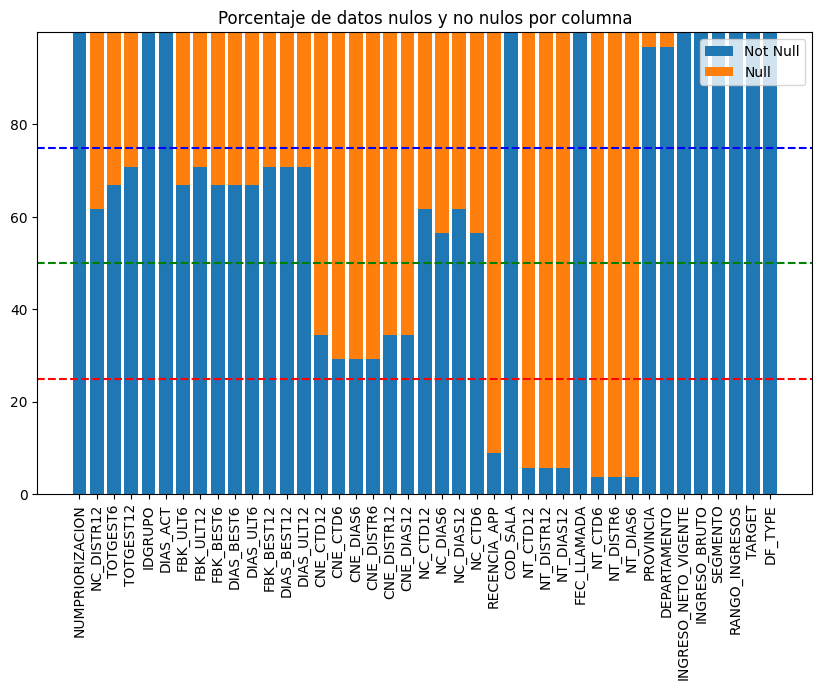

In [28]:
df = pd.read_parquet('./data/1_data_exploracion_datos.parquet')
plot_percent_cols(df)

### 2. Limpieza general de datos

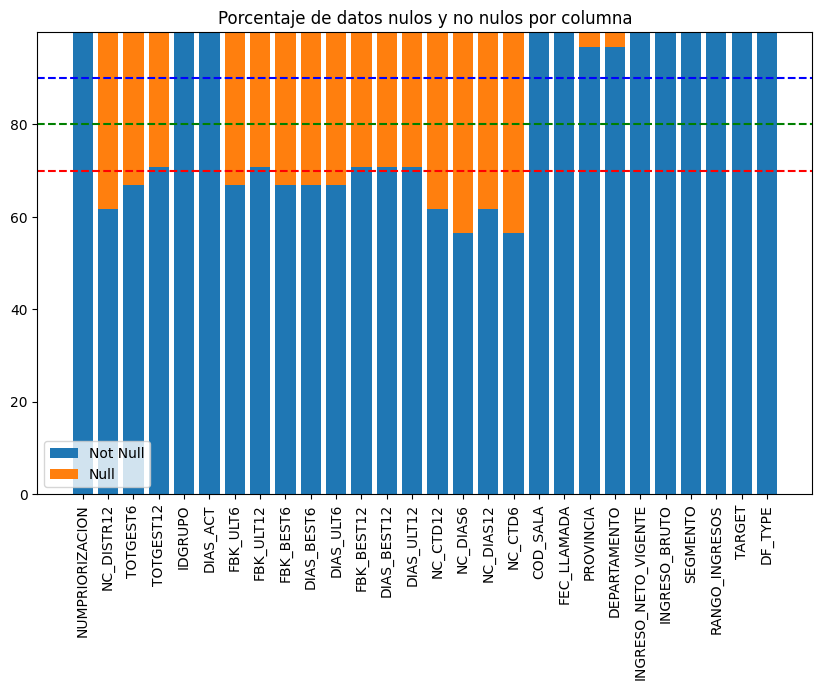

In [29]:
# Eliminar las columnas con más del 50% de datos nulos
df = df.dropna(thresh=df.shape[0]*0.5, axis=1)
plot_percent_cols(df, li=70, lm=80, ls=90)

### 3. Limpieza y tratamiento de datos categóricos

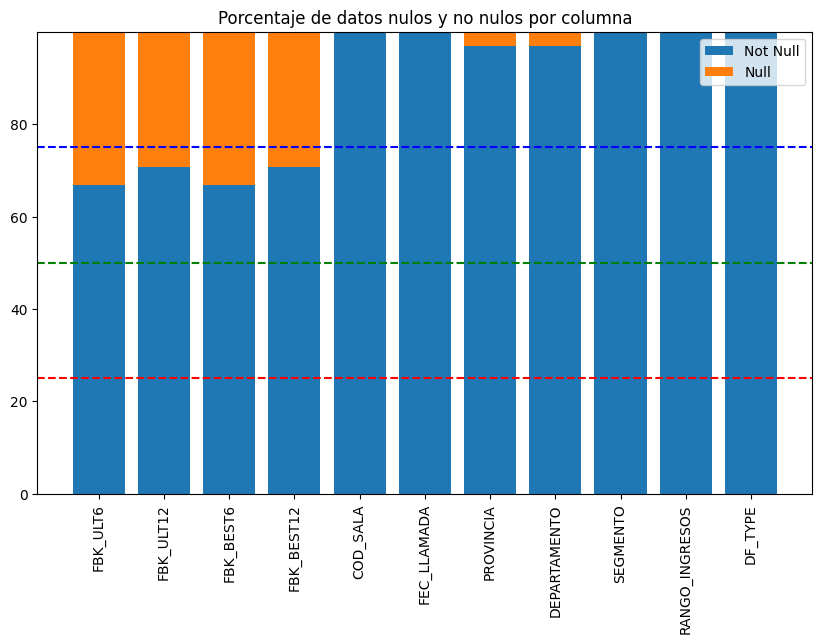

In [35]:
# Seleccionar las columnas con datos categoricos
df_cat = df.select_dtypes(include=['object'])
plot_percent_cols(df_cat)

In [41]:
# FBK_ULT6: Último feedback de lo que ocurrió en los últimos 6 meses
df_cat['FBK_ULT6'].value_counts(dropna=False)

FBK_ULT6
TLV     787576
None    432317
IVR      78553
COB       7159
Name: count, dtype: int64